# 梯度下降法
- (1)将权重w初始化为0或一个极小的随机数
- (2)迭代所有样本x，并输出y值，更新权重w

## 要求：观察不同的学习速率对模型收敛性的影响，如何解决？

## 程序

In [3]:
#初始化w和η和迭代次数
#更新w，得到误差
#计算wx 得到y
#载入数据
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#解决绘图中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data',header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


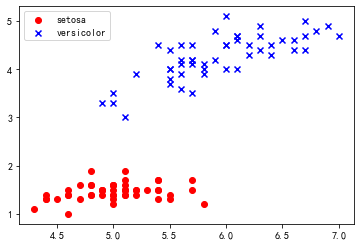

In [5]:
#创建数据
y=[]
for i in range(100):
    if df.iloc[i,4] == 'Iris-setosa':
        y.append(1)
    else:
        y.append(-1)   

x = pd.DataFrame({'萼片':df.iloc[:100,0],'花瓣':df.iloc[:100,2]})

#绘图观察
plt.figure()
plt.scatter(x.iloc[:50,0],x.iloc[:50,1],color='red',marker='o',label='setosa')
plt.scatter(x.iloc[50:100,0],x.iloc[50:100,1],color='blue',marker='x',label='versicolor')
plt.legend(loc='upper left')
plt.show()

In [6]:
#定义变量
X=x.values
Y=np.array([y]).T
eta = 0.01
n_iter = 10
w = np.zeros(1+x.shape[1])
errors=[]

In [7]:
#编写感知器
def predict(xi):
    result=np.dot(xi,w[1:])+w[0]
    return np.where(result>=0,1,-1)

for i in range(n_iter):
    error=0
    for xi,target in zip(X,Y):
        deta_w = eta*(target-predict(xi))
        w[1:] += deta_w*xi
        w[0] += deta_w
        if deta_w != 0:
            error +=1
    errors.append(error)


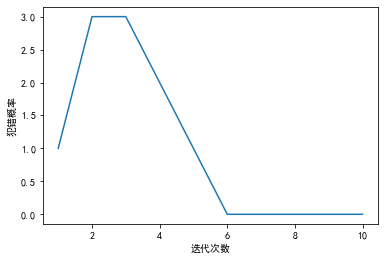

In [8]:
#犯错个数
plt.figure()
plt.xlabel('迭代次数')
plt.ylabel('犯错概率')
plt.plot(np.linspace(1,10,10),errors)
plt.show()

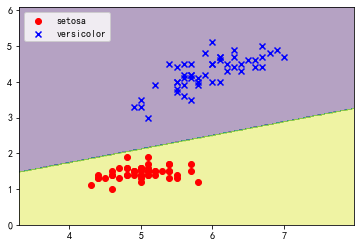

In [9]:
#绘制决策区域
x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1     #x1的最大最小值
x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1     #x2的最大最小值
xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,0.02),np.arange(x2_min,x2_max,0.02))
Z=predict(np.array([xx1.ravel(),xx2.ravel()]).T) 
Z=Z.reshape(xx1.shape)
plt.contourf(xx1,xx2,Z,alpha=0.4)    #等高线
plt.scatter(x.iloc[:50,0],x.iloc[:50,1],color='red',marker='o',label='setosa')
plt.scatter(x.iloc[50:100,0],x.iloc[50:100,1],color='blue',marker='x',label='versicolor')
plt.legend(loc='upper left')
plt.show()

#### 数据线性可分，故感知机模型必再迭代一定次数后会收敛

## 梯度下降优化迭代

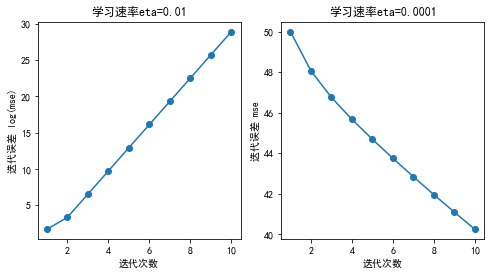

In [10]:
#初始变量
n_iter=10
w = np.zeros(1+x.shape[1])
error=[]
cost1=[]
cost2=[]
for i in range(n_iter):
    y_hat=np.dot(X,w[1:])+w[0] #预测值
    res = y-y_hat
    w[1:]=w[1:]+0.01*np.dot(X.T,res)
    w[0]=w[0]+0.01*sum(res)
    cost=sum(res**2)/2
    cost1.append(cost)
w = np.zeros(1+x.shape[1])
for i in range(n_iter):
    y_hat=np.dot(X,w[1:])+w[0] #预测值
    res = y-y_hat
    w[1:]=w[1:]+0.0001*np.dot(X.T,res)
    w[0]=w[0]+0.0001*sum(res)
    cost=sum(res**2)/2
    cost2.append(cost)
    
fig,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(np.arange(1,11),np.log10(cost1),marker='o')
ax[0].set_ylabel('迭代误差 log(mse)')
ax[0].set_xlabel('迭代次数')
ax[0].set_title('学习速率eta=0.01')
ax[1].plot(np.arange(1,11),cost2,marker='o')
ax[1].set_ylabel('迭代误差 mse')
ax[1].set_xlabel('迭代次数')
ax[1].set_title('学习速率eta=0.0001')
plt.show()

#### 学习速率0.01时，误差不断增大，说明学习步长太大，跳过了全局最优解

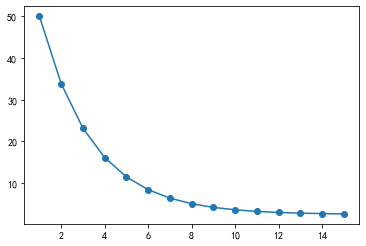

In [11]:
#对数据进行标准化处理
X_std = np.copy(X)
X_std[:,0]=(X[:,0]-X[:,0].mean())/X[:,0].std()
X_std[:,1]=(X[:,1]-X[:,1].mean())/X[:,1].std()
cost3=[]
w = np.zeros(1+x.shape[1])
for i in range(15):
    y_hat=np.dot(X_std,w[1:])+w[0] #预测值
    res = y-y_hat
    w[1:]=w[1:]+0.01*np.dot(X_std.T,res)
    w[0]=w[0]+0.01*sum(res)
    cost=sum(res**2)/2
    cost3.append(cost)
    
plt.plot(np.arange(1,16),cost3,marker='o')
plt.show()

#### 经过标准化处理后，在学习速率=0.01时，算法可以收敛，但其SSE扔不为0